# TP2

## Valores faltantes

# Ejercicio 1

- Leer y obtener el siguiente dataset sobre <a href="https://archive.ics.uci.edu/ml/datasets/Sponge">esponjas</a>
- Analizar la naturaleza y distribución de los datos faltantes
- Selecccionar e implementar el mejor método para tratar los datos faltantes
- Justificar la elección


In [2]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Leer Csv
df = pd.read_csv(r"C:\Users\Nicolas\Proyectos Programacion\Base-de-Datos-II\base-de-datos-ii\data\sponge.data", delimiter = ",")
df


,AAPTOS_AAPTOS,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO.1,NO.2,3,NO.3,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,0,NO.12,OTROS,RUGOSA,RADIAL,NO.13,NO.14,NO.15,DURO
0,ALECTONA_MILLARI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,?,LISA,CONFUSA,NO,SI,NO,DURO
1,CLIONA_CARTERI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
2,CLIONA_CELATA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,3,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
3,CLIONA_LABYRINTHICA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
4,CLIONA_SCHMIDTI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,TRICHOSTEMA_HEMISPHAERICUM,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,4,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,HEMISFERICA,2,SI,OTROS,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
71,TRICHOSTEMA_SARSI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,DE_CONO_INVERTIDO,2,SI,?,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
72,TYLEXOCLADUS_JOUBINI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,ECTOSOMICOS_EN_RAMILLETES,...,DE_REVESTIMIENTO,0,NO,?,HISPIDEZ_MAYOR_HACIA_LA_BASE,RADIAL,NO,NO,NO,DURO
73,WEBERELLA_BURSA,2_CAPAS,TANGENCIAL,SI,SI,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,GLOBULOSA,2,SI,OTROS,ATERCIOPELADA,RADIAL_EN_PERIFERIA,NO,NO,NO,DURO


Tipo de atributos

In [3]:
# Ver tipo de atributos
df.dtypes

AAPTOS_AAPTOS                        object
1_CAPA                               object
SIN_CAPA_INTERNA_DEL_CORTEX          object
SI                                   object
NO                                   object
NO.1                                 object
NO.2                                 object
3                                     int64
NO.3                                 object
SIN_TILOSTILOS_ADICIONALES           object
1_TIPO                               object
NO.4                                 object
NO.5                                 object
NO.6                                 object
NO.7                                 object
SI.1                                 object
NO.8                                 object
NO.9                                 object
SIN_ESPICULA_PRINCIPAL_ESTILO        object
SIN_ESPICULA_PRINCIPAL_TILOSTILO_    object
SIN_TILOSTILOS                       object
EMPALIZADA                           object
SUBESFERICA_ALARGADA_OVOIDE     

Naturaleza y distribución de los datos faltantes

In [4]:
# seleccionamos los faltantes, reemplazando los "?", utilizamos este metodo al encontrar missing values en Python.
faltantes =[]
# buscamos por columna
for column in df.columns:
    item = {}
    # igualamos las columnas
    item["column"] = column
    # pasamos a df el tipo como dato
    item["type"] = df[column].dtypes
    # sacamos el porcentaje de la columna faltante x 100
    item["percentage"] = np.mean(df[column] == "?")*100
    # sumamos la columna cantidad faltante
    item["quantity"] = np.sum(df[column] == "?")
    # agregamos los cambios
    faltantes.append(item)

# creamos el dataframe nuevo con pandas
faltantes_df = pd.DataFrame(faltantes)
# llamamos
faltantes_df

,column,type,percentage,quantity
0,AAPTOS_AAPTOS,object,0.000000,0
1,1_CAPA,object,0.000000,0
2,SIN_CAPA_INTERNA_DEL_CORTEX,object,0.000000,0
3,SI,object,0.000000,0
4,NO,object,0.000000,0
5,NO.1,object,0.000000,0
6,NO.2,object,0.000000,0
7,3,int64,0.000000,0
8,NO.3,object,0.000000,0
9,SIN_TILOSTILOS_ADICIONALES,object,0.000000,0


<AxesSubplot: >

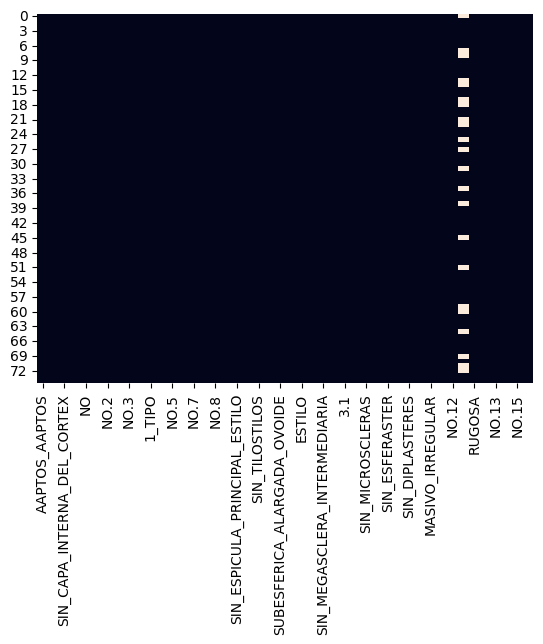

In [5]:
sns.heatmap(df.isin(['?']), cbar=False)

In [6]:
# agrupamos los datos faltantes que tenga porcentaje mayor a 0
missing_df = faltantes_df.loc[faltantes_df["percentage"] > 0]
missing_df

,column,type,percentage,quantity
39,OTROS,object,29.333333,22


# Ejercicio 2

- Leer y obtener el siguiente dataset sobre <a href="https://archive.ics.uci.edu/ml/datasets/Echocardiogram">ecocardiogramas</a>
- Analizar la naturaleza y distribución de los datos faltantes
- Selecccionar e implementar el mejor método para tratar los datos faltantes
- Justificar la elección


In [7]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
# inline hace que muestre los graficos en el notebook, sino se crearía un archivo aparte
import seaborn as sns

path = r"C:\Users\Nicolas\Proyectos Programacion\Base-de-Datos-II\base-de-datos-ii\data\echocardiogram.data"
# Leer y obtener el dataset
df2 = pd.read_csv(path, delimiter=",", header=None, on_bad_lines='skip')
df2.columns = ["survival","still-alive","age-at-heart-attack","pericardial-effusion","fractional-shortening","epss","lvdd","wall-motion-score","wall-motion-index","mult","name","group","alive-at-1"]
df2

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
127,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
128,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
129,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


Tipo de atributos

In [8]:

df2.dtypes

survival                 object
still-alive               int64
age-at-heart-attack      object
pericardial-effusion      int64
fractional-shortening    object
epss                     object
lvdd                     object
wall-motion-score        object
wall-motion-index        object
mult                     object
name                     object
group                    object
alive-at-1               object
dtype: object

Naturaleza y distribución de los datos faltantes

In [9]:
valor = ["?"]
faltantes = []  # lista
for columna in df2.columns:
    atributo = {}  # tupla
    atributo["column"] = columna
    # Obtener promedio de valores nulos para la columna
    atributo["percentage"] = np.mean(df2[columna].isin(valor))*100  # multiplica x 100 porque es porcentje
    # Obtener cantidad de valores nulos para la columna
    atributo["quantity"] = np.sum(df2[columna].isin(valor))
    faltantes.append(atributo)  

# Convertir lista de diccionarios en dataframe
faltantes_df2 = pd.DataFrame(faltantes)

faltantes_df2

,column,percentage,quantity
0,survival,0.763359,1
1,still-alive,0.000000,0
2,age-at-heart-attack,3.816794,5
3,pericardial-effusion,0.000000,0
4,fractional-shortening,5.343511,7
5,epss,10.687023,14
6,lvdd,7.633588,10
7,wall-motion-score,2.290076,3
8,wall-motion-index,0.763359,1
9,mult,2.290076,3


<AxesSubplot: >

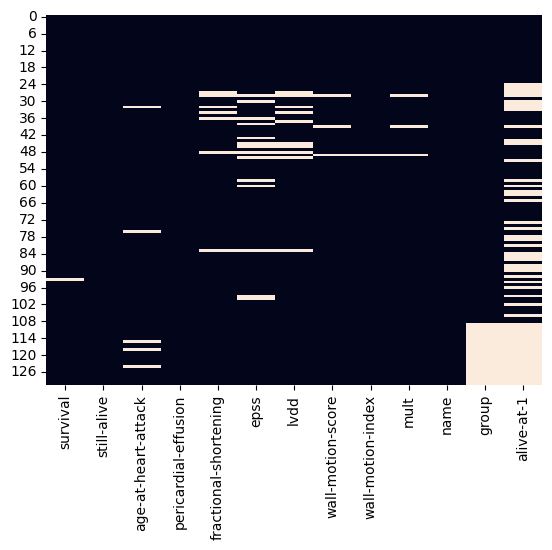

In [10]:
sns.heatmap(df2.isin(['?']), cbar=False)

Método para tratar los datos faltantes
Método posible: cada vez que haya un 0 en la segunda columna, que significa que el paciente está muerto, en la última columna, la de predicción de supervivencia, remplace los datos faltantes con un 0, que significa que el paciente murió.

In [11]:
# Metodo para tratar los datos faltantes
df_sin_muestras = df2.copy(deep = False)
# Obtener índices de muestras con más de dos atributos faltantes
faltantes_index = df_sin_muestras[df_sin_muestras['alive-at-1'] == '?'].index
# Eliminar esos índices de el dataframe
df_sin_muestras = df_sin_muestras.drop(faltantes_index, axis=0)
# para columna mult
df_sin_muestras.drop("mult",inplace=True, axis=1)
df_sin_muestras

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,name,group,alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
103,1.25,1,63,0,0.30,6.9,3.52,18.16,1.51,name,2,1
104,24,0,59,0,0.17,14.3,5.49,13.5,1.50,name,2,0
105,25,0,57,0,0.228,9.7,4.29,11,1,name,2,0
107,.75,1,78,0,0.23,40,6.23,14,1.4,name,2,1


<AxesSubplot: >

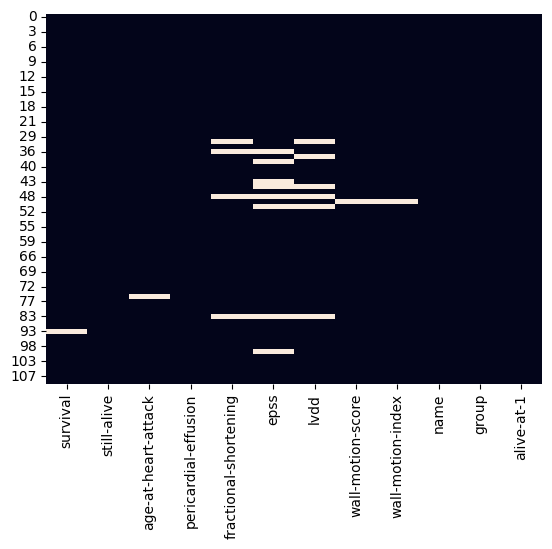

In [12]:
sns.heatmap(df_sin_muestras.isin(['?']), cbar=False)